In [18]:
import pandas as pd
from pymongo import MongoClient
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DayLocator, MonthLocator, DateFormatter
from nltk.corpus import stopwords as sw
stopwords = sw.words('german')
import numpy as np

# Corpus growth

In [13]:
date_range = pd.date_range('2016-11-21', datetime.now(), period='1D')
client = MongoClient('mongodb://localhost:27017/')
db = client.articles

In [14]:

article_counts = []
for date in date_range:
    num_articles = db.articles.find({'date': {'$lt': date}, 'text': { '$exists': True, "$ne" : "" } }).count()
    article_counts.append((date, num_articles))

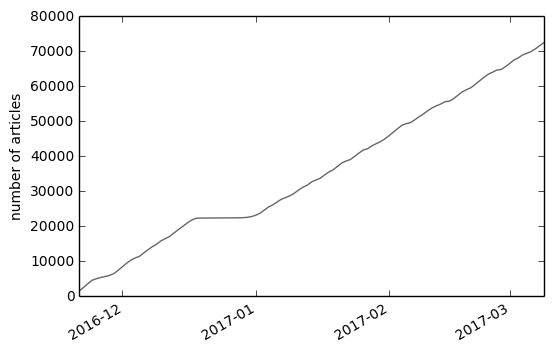

In [15]:
%matplotlib inline

dates = [x for x,y in article_counts]
counts = [y for x,y in article_counts]

fig, ax = plt.subplots()
ax.plot_date(dates, counts, 'g', color = '0.4')

ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m'))

ax.fmt_xdata = DateFormatter('%Y-%m')
fig.autofmt_xdate()
#ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

#plot = plt.plot(article_counts)
plt.ylabel('number of articles')
plt.savefig('corpus_size.pdf', format='pdf')
plt.show()

# Article Length Histogram

In [ ]:
all_articles = db.articles.find()
article_sizes = []
for i, article in enumerate(all_articles):
    print(i)
    article_sizes.append(len(article['text']))

68760
0.885204114474


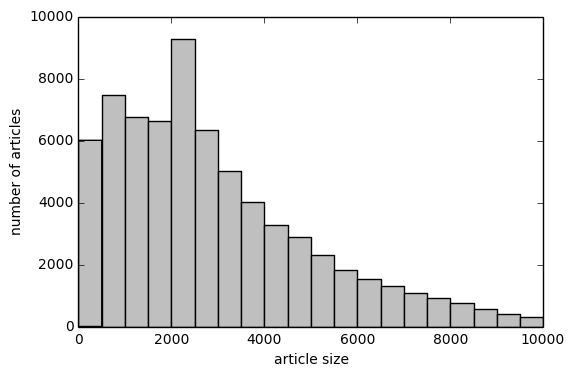

In [21]:
%matplotlib inline

def is_outlier(points, thresh=3.5):

    return x > 10000 or x == 0

import pickle

#with open('article_sizes.pickle','wb') as f:
    #pickle.dump(article_sizes, f)
    #article_sizes2 = pickle.load(f)

filtered_sizes = [x for x in article_sizes if not is_outlier(x)]
print(len(filtered_sizes))
print(len(filtered_sizes) / float(len(article_sizes)))

plt.hist(filtered_sizes, bins=20, color='0.75')
plt.ylabel('number of articles')
plt.xlabel('article size')
plt.savefig('article_size.pdf', format='pdf')
plt.show()

# Word frequency histogram

In [13]:
# load all category corpora
from collections import Counter
category_names = ['Sonstiges', 'Aktuell', 'Lifestyle', 
          'Wirtschaft', 'Finanzen', 'Ausland', 'Lokal', 
          'Politik', 'Sport', 'Technologie', 'Kultur', 'Ignore']

paths = [(x, "news/corpus/corpus{}.txt".format(x)) for x in category_names]

def load_sets(paths):
    X, y = [], []

    for name, path in paths:
        with open(path) as cur_file:
            for line in cur_file:
                tokens = [x for x in line.split() if x not in stopwords]
                if len(tokens) > 0:
                    X.append(tokens)
                    y.append(name)
    print("loaded {} articles".format(len(X)))
    return X, y

X, y = load_sets(paths)

/Users/daniel/Library/Python/2.7/lib/python/site-packages/ipykernel/__main__.py:15: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


loaded 49621 articles


In [14]:
#build the dict
from IPython.display import clear_output
total = Counter()
tot = len(X)
for i, article in enumerate(X):
    if i%100 == 0:
        clear_output()
        print("{}/{}".format(i, tot))
    total.update(article)

49600/49621


In [15]:
print(total['und'])

0


In [16]:
total_words = sum(total.values())
unique_words = len(total.values())

print("Total words: {}\nUnique words: {}".format(total_words, unique_words))
frequent_words = {k: v for k,v in total.iteritems() if v >= 5}


sum_frequent_words = sum(frequent_words.values())
num_frequent_words = len(frequent_words.values())
print(sum_frequent_words)
print("{} frequent words".format(num_frequent_words))

Total words: 13233740
Unique words: 377777
12804395
108900 frequent words


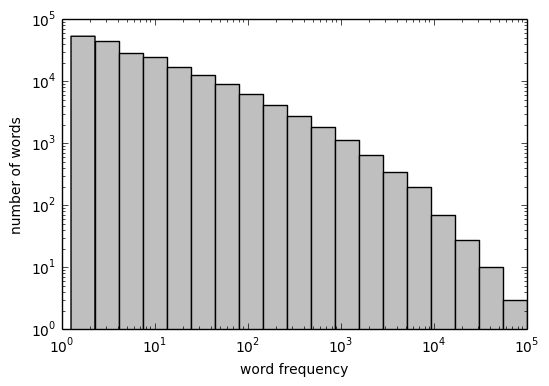

In [27]:
%matplotlib inline
plt.yscale('log', nonposy='clip')
plt.hist(total.values(), bins=np.logspace(0.1, 5, 20), color='0.75')
plt.gca().set_xscale("log")
plt.ylabel('number of words')
plt.xlabel('word frequency')
plt.savefig('word_frequencies.pdf', format='pdf')
plt.show()